<a href="https://colab.research.google.com/github/lifepopkay/Tech-Monies/blob/Modelling/Third_Model_dropping_upper_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Mergered%20Cleaned%20Data%203.csv'
df = pd.read_csv(url)

In [3]:
df.head(2)

,id,company,location,postDate,title scraped for,Country,State,age,Position,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,job_3e1d31dda6c5cb4b,Offerzen,Lagos,Just posted,Data Scientist,Nigeria,Lagos,NaN,Senior Level,NaN,NaN,NaN,2.0,Full-time,NaN,Senior Software Engineer,"['asp', 'C', 'R', 'D', 'AWS']"
1,job_c3e2ed6ba483528b,GVA Partners,Lagos,Today,Data Scientist,Nigeria,Lagos,NaN,NaN,NaN,NaN,NaN,4.0,NaN,undergraduate,Data Scientist,"['Regression', 'C', 'KNN', 'Python', 'D', 'asp..."


In [4]:
# Standardizing the title 
ML=['Machine Learning', 'Machine Learning ']
for title in ML:
    df['title scraped for'].replace(title,'Machine Learning Engineer', inplace = True)

In [5]:
# Dropping records for canada
df = df.query("Country != 'Canada'")
# Dropping records for data engineering
df = df[df["title scraped for"] != "Data Engineer"]

# Columns to drop
columns_to_drop = ["company", "location", "State", "age", "id","postDate"]

In [6]:
# Drop unnecessary columns
df.drop(columns_to_drop, axis="columns", inplace = True)

In [7]:
# Defining a function that replaces all values o years of eperience greater than 30 with np.nan
def yoe_greater_than_30(yoe):
    if yoe > 30:
        return np.nan
    else:
        return yoe
df.year_of_exp = df.year_of_exp.apply(yoe_greater_than_30)

In [8]:
# Replace "hs" with "high school diploma" in eligibility
df.eligibility.replace("hs",'high school diploma', inplace = True)

# Fill missing values for eligibility with "high school diploma"
df.eligibility.fillna('high school diploma', inplace = True)

In [9]:
# Fill missing values for contract_type with the mode of contract_type
#df.contract_type.fillna(df.contract_type.mode()[0], inplace = True)

In [10]:
# Creating an exchange rate for each country currency with respect to UD dollars
Exchange_rate = {"Nigeria": 427.88,
"India": 79.97,
"USA": 1,
"UK": 1.17}
df["Exchange_rate"] = df.Country.map(Exchange_rate)

# Converting the salary currency for each Job to US dollars
df.upper_salary = df.upper_salary / df.Exchange_rate
df.lower_salary = df.lower_salary / df.Exchange_rate

df.drop('Exchange_rate', axis= "columns", inplace = True)

On exploring the salary for missing Payment frequency, it was discovered that the salary far exceeds the salary for hourly payment frequency and is far below the salary for minthly payment frequency. 

So the the missing values for payment frequency will be filled with "Weekly"

In [11]:
# Filling the missing values for payment frequency with "Weekly"
df.payment_frequency.fillna("Weekly", inplace = True)

In [12]:
# Defining a function that cleans the skills column
def convert_skill_list_to_list(skills):
    skills = skills.replace("[", "")
    skills = skills.replace("]","")
    skills = skills.replace("'", "")
    Skills_list = skills.split(",")
    Skills_lists = []
    for skill in Skills_list:
        skill = skill.strip()
        Skills_lists.append(skill)
    return Skills_lists

In [13]:
# Converting the skills list to an actaul list
df.skills_list = df.skills_list.apply(convert_skill_list_to_list)

In [14]:
# Defining a function that counts the number of job posting that require a particular skill
def Skills_table(df):
    list_skill = {}
    for Skill_list in df.skills_list:
        for Skill in Skill_list:
            if Skill in list_skill:
                list_skill[Skill] += 1
            else:
                list_skill[Skill] = 1
    skill_df = pd.DataFrame(list_skill, index = ["Number of jobs"]).T.sort_values("Number of jobs", ascending = False)
    return skill_df

In [15]:
# Selecting the Job postings for data analyst roles
DA_df = df[df["title scraped for"] == "Data Analyst"]

# Selecting the Job postings for data scientist roles
DS_df = df[df["title scraped for"] == "Data Scientist"]

# Selecting the Job postings for business analyst roles
BA_df = df[df["title scraped for"] == "Business Analyst"]

# Selecting the Job postings for machine learning engineering roles
ML_df = df[df["title scraped for"] == "Machine Learning Engineer"]

# Selecting the Job postings for web developer roles
WD_df = df[df["title scraped for"] == "Web Developer"]

# Selecting the Skills required for Data analyst roles
DASkills_df = Skills_table(DA_df)

# Saving the top 10 skills for Data Analyst to a list
DAT10_skills = list(DASkills_df.head(10).index)

# Selecting the Skills required for Data scientist roles
DSSkills_df = Skills_table(DS_df)

# Saving the top 10 skills for Data Scientist to a list
DST10_skills = list(DSSkills_df.head(10).index)

# Selecting the Skills required for Business analyst roles
BASkills_df = Skills_table(BA_df)

# Saving the top 10 skills for Business Analyst to a list
BAT10_skills = list(BASkills_df.head(10).index)

# Selecting the Skills required for Machine learning roles
MLSkills_df = Skills_table(ML_df)

# Saving the top 10 skills for Machine learning to a list
MLT10_skills = list(MLSkills_df.head(10).index)

# Selecting the Skills required for Web developer roles
WDSkills_df = Skills_table(WD_df)

# Saving the top 10 skills for Web developer to a list
WDT10_skills = list(WDSkills_df.head(10).index)

# Merging the top 10 skills for each role into a set
Most_popular_skills = set(DAT10_skills + DST10_skills + BAT10_skills + MLT10_skills + WDT10_skills)

len(list(Most_popular_skills))

22

In [16]:
# Dropping missing values for title scraped for
df.dropna(subset = ["title scraped for"], inplace = True)

In [17]:
# Dropping records with missing values for lower salary range
df.dropna(subset=["lower_salary"], inplace = True)

In [18]:
# Defining a function that counts the number of recors we have for each level for each role for each country
def number_of_observations(data):
    return data.groupby(["Country","title scraped for","Position"]).agg({"Position":"count"})

number_of_observations(df)

Position
Country title scraped for         Position              
India   Business Analyst          Mid-Level            2
                                  Senior Level         5
        Data Analyst              Senior Level         7
        Data Scientist            Mid-Level            4
                                  Senior Level        24
        Machine Learning Engineer Mid-Level            4
                                  Senior Level        17
        Web Developer             Mid-Level            9
                                  Senior Level        54
Nigeria Business Analyst          Senior Level         5
        Data Analyst              Senior Level         2
        Data Scientist            Senior Level         1
        Machine Learning Engineer Mid-Level            1
                                  Senior Level         5
        Web Developer             Mid-Level            2
                                  Senior Level         2
UK      Business Analyst          Mid-Level            1
                                  Senior Level        61
        Data Analyst              Mid-Level            1
                                  Senior Level       458
        Data Scientist            Entry Level          1
                                  Mid-Level           13
                                  Senior Level       171
        Machine Learning Engineer Mid-Level            3
                                  Senior Level        51
        Web Developer             Mid-Level           40
                                  Senior Level       119
USA     Business Analyst          Mid-Level            6
                                  Senior Level       128
        Data Analyst              Entry Level          3
                                  Mid-Level            9
                                  Senior Level        44
        Data Scientist            Entry Level          1
                                  Mid-Level            7
                                  Senior Level       266
        Machine Learning Engineer Entry Level          3
                                  Mid-Level           10
                                  Senior Level        98
        Web Developer             Entry Level          2
                                  Mid-Level           15
                                  Senior Level        54

In [19]:
# Determining the average years of experience for each role and position
df.groupby(["title scraped for","Position"])[["year_of_exp"]].agg(np.mean)

year_of_exp
title scraped for         Position                 
Business Analyst          Mid-Level        3.750000
                          Senior Level     4.162162
Data Analyst              Entry Level      1.000000
                          Mid-Level        3.428571
                          Senior Level     3.947368
Data Scientist            Entry Level      1.000000
                          Mid-Level        2.785714
                          Senior Level     3.666667
Machine Learning Engineer Entry Level      3.500000
                          Mid-Level        3.750000
                          Senior Level     6.000000
Web Developer             Entry Level      5.000000
                          Mid-Level        2.833333
                          Senior Level     3.590278

In [20]:
# Defining a function that determines the Position based on years of expereience
def Position_based_on_yoe(data):
    data.reset_index(drop=True, inplace = True)
    for i in range(data.shape[0]):
        if  data.loc[i,"Position"] is np.nan:
            if data.loc[i,"title scraped for"] == 'Business Analyst':
                if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 'Data Analyst':
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"]== 'Data Scientist':
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"
            elif data.loc[i,"title scraped for"] == 'Machine Learning Engineer':
                if  data.loc[i,"year_of_exp"] > 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 'Web Developer':
                if  data.loc[i,"year_of_exp"] >= 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 2:
                    data.loc[i,"Position"] = "Entry Level"
        
        else:
            data.loc[i,"Position"] = data.loc[i,"Position"]
    return data

In [21]:
# Making a copy of the data frame
data = df.copy()

# Determining the position of the job role using the Position_based_on_yoe function
df = Position_based_on_yoe(data)

In [22]:
# Defining a function that counts the number of recors we have for each level for each role for each country
def number_of_observations(data):
    return data.groupby(["Country","title scraped for","Position"]).agg({"Position":"count"})

number_of_observations(df)

Position
Country title scraped for         Position              
India   Business Analyst          Entry Level         38
                                  Mid-Level           20
                                  Senior Level        10
        Data Analyst              Entry Level         34
                                  Mid-Level           10
                                  Senior Level        15
        Data Scientist            Entry Level         53
                                  Mid-Level           22
                                  Senior Level        40
        Machine Learning Engineer Entry Level         69
                                  Mid-Level           26
                                  Senior Level        29
        Web Developer             Entry Level        194
                                  Mid-Level          126
                                  Senior Level        67
Nigeria Business Analyst          Entry Level          2
                                  Mid-Level           21
                                  Senior Level         5
        Data Analyst              Entry Level          1
                                  Mid-Level            8
                                  Senior Level         6
        Data Scientist            Mid-Level            1
                                  Senior Level         2
        Machine Learning Engineer Mid-Level            2
                                  Senior Level         5
        Web Developer             Entry Level          5
                                  Mid-Level           14
                                  Senior Level         6
UK      Business Analyst          Mid-Level          386
                                  Senior Level        61
        Data Analyst              Mid-Level            1
                                  Senior Level       458
        Data Scientist            Entry Level         33
                                  Mid-Level           33
                                  Senior Level       466
        Machine Learning Engineer Mid-Level            3
                                  Senior Level       316
        Web Developer             Entry Level         19
                                  Mid-Level           99
                                  Senior Level       143
USA     Business Analyst          Entry Level         30
                                  Mid-Level          579
                                  Senior Level       145
        Data Analyst              Entry Level         47
                                  Mid-Level           41
                                  Senior Level        64
        Data Scientist            Entry Level         31
                                  Mid-Level          401
                                  Senior Level       294
        Machine Learning Engineer Entry Level        102
                                  Mid-Level           52
                                  Senior Level       137
        Web Developer             Entry Level         22
                                  Mid-Level           65
                                  Senior Level        92

In [23]:
# Number of missing values for Position. These indicates Positions for job roles with missing values for years of experience
df.Position.isna().sum()

808

In [24]:
Frequency_to_yearly = {"Hourly": 40 * 52,
"Weekly": 52,
"Monthly": 12,
"Yearly": 1}
df["Frequency_to_yearly"] = df.payment_frequency.map(Frequency_to_yearly)

# Standardizing the payment frequency to Yearly
df.upper_salary = df.upper_salary * df["Frequency_to_yearly"]
df.lower_salary = df.lower_salary * df["Frequency_to_yearly"]
df.drop('Frequency_to_yearly', axis= "columns", inplace = True)

In [25]:
# Dropping unwanted columns
df.drop(['title_cleaned','payment_frequency'], axis="columns", inplace = True)

In [26]:
#df.dropna(subset=["upper_salary"], inplace = True)

In [27]:
# Determining the average upper and lower salary for each level for each title for each country
df.groupby(["Country", "title scraped for", "Position"])[["lower_salary","upper_salary"]].agg(np.mean)

lower_salary   upper_salary
Country title scraped for         Position                                  
India   Business Analyst          Entry Level     3977.582383    7167.303755
                                  Mid-Level       8195.926597   16694.828894
                                  Senior Level   14283.956484   20863.223709
        Data Analyst              Entry Level     3941.339767    6863.545258
                                  Mid-Level       5337.035138   11998.191822
                                  Senior Level   15578.241841   26181.279518
        Data Scientist            Entry Level     7370.231054   14423.958985
                                  Mid-Level       7571.778053   15963.670752
                                  Senior Level   16775.040640   28908.425129
        Machine Learning Engineer Entry Level     9310.508288   12973.596458
                                  Mid-Level      12556.005617   20302.353263
                                  Senior Level   16162.009029   28012.908687
        Web Developer             Entry Level     3331.118306    6622.027615
                                  Mid-Level       6772.828600   10143.233637
                                  Senior Level    7648.726481   13120.181607
Nigeria Business Analyst          Entry Level     3505.655791            NaN
                                  Mid-Level       7472.054915   11942.600729
                                  Senior Level   15985.790409   12620.360849
        Data Analyst              Entry Level     2804.524633            NaN
                                  Mid-Level       6723.847808    7992.895204
                                  Senior Level   10049.546602   20099.093204
        Data Scientist            Mid-Level      19631.672432            NaN
                                  Senior Level    5609.049266            NaN
        Machine Learning Engineer Mid-Level       4206.786950            NaN
                                  Senior Level    4487.239413    7852.668973
        Web Developer             Entry Level     2832.569879    5609.049266
                                  Mid-Level       6610.665207    7946.153127
                                  Senior Level   12262.004923   26713.097130
UK      Business Analyst          Mid-Level      34472.101324   39475.532544
                                  Senior Level   41273.448228   51241.564474
        Data Analyst              Mid-Level      55555.555556   85470.085470
                                  Senior Level   34595.680961   43543.118363
        Data Scientist            Entry Level    48974.747475   62348.553583
                                  Mid-Level      52204.014504   55428.576737
                                  Senior Level   49833.157624   63350.063472
        Machine Learning Engineer Mid-Level      45584.045584   47008.547009
                                  Senior Level   42834.850698   53293.836013
        Web Developer             Entry Level   111129.554656   36868.888889
                                  Mid-Level      54222.595183   61754.035574
                                  Senior Level   43813.364413   55341.097532
USA     Business Analyst          Entry Level    71646.666667   91435.333333
                                  Mid-Level      75873.553022   96417.677273
                                  Senior Level   89781.788966  114852.077037
        Data Analyst              Entry Level    68718.361702   85928.608696
                                  Mid-Level      68509.434146   87205.070000
                                  Senior Level   84156.425000  108995.219672
        Data Scientist            Entry Level   101763.258065  133110.200000
                                  Mid-Level     103565.383042  130790.239554
                                  Senior Level  108379.372109  139339.406338
        Machine Learning Engineer Entry Level   101019.713725  128220.010753
                                  Mid-Level  

In [28]:
# Populating the each skills with 1 if a particular role required the skill and 0 if otherwise
i = 0
for skills_list in df.skills_list:
        for skill in skills_list:
            if skill in Most_popular_skills:
            #skill = skill.strip()
                df.loc[i, skill] = 1
        i +=1

In [29]:
# Dropping the skills list column
df.drop(["skills_list"], axis="columns", inplace = True)

In [30]:
# Adding the most popular skills to the dataframe
for Skill in list(Most_popular_skills):
    df[Skill] = 0

In [31]:
df.head()

,title scraped for,Country,Position,upper_salary,lower_salary,year_of_exp,contract_type,eligibility,R,Spark,...,HTML,Excel,Go,PostgreSQL,Vi,client,ETL,Machine Learning,,SDLC
0,Data Scientist,Nigeria,Mid-Level,NaN,19631.672432,3.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Nigeria,Senior Level,NaN,5609.049266,5.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,Nigeria,Senior Level,NaN,5609.049266,6.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Web Developer,Nigeria,Senior Level,37393.661774,21033.934748,5.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Web Developer,Nigeria,Senior Level,39730.765635,23371.038609,5.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0


### Categorical Column Coding map

In [32]:
# Making a copy of the data
df7 = df.copy()
# Encoding the categorical variables
df6 = df.copy()
categorical_columns = ["title scraped for",'Country','Position','contract_type','eligibility']
df[categorical_columns] = df[categorical_columns].astype('category')
df6 = df.copy()
for x in categorical_columns:
        df[x] = df[x].cat.codes
   

In [33]:
# Saving the codes for Variable
Title_scrapped_for  = dict(enumerate(df6['title scraped for'].cat.categories))
COUNTRY  = dict(enumerate(df6['Country'].cat.categories))
POSITION = dict(enumerate(df6['Position'].cat.categories))
CONTRACT_TYPE = dict(enumerate(df6['contract_type'].cat.categories))
ELIGIBILTY = dict(enumerate(df6['eligibility'].cat.categories))

In [34]:
# Restoring the actual values for position using the duplicate data
df.Position = df7.Position

# Confirming the Position column has been restored
df.Position.isna().sum()

808

In [35]:
# Code or mapping for Title Scraped for
Title_scrapped_for

{0: 'Business Analyst',
 1: 'Data Analyst',
 2: 'Data Scientist',
 3: 'Machine Learning Engineer',
 4: 'Web Developer'}

In [36]:
# Code or mapping for Country
COUNTRY

{0: 'India', 1: 'Nigeria', 2: 'UK', 3: 'USA'}

In [37]:
# Code or mapping for Position
POSITION

{0: 'Entry Level', 1: 'Mid-Level', 2: 'Senior Level'}

In [38]:
# Code or mapping for Contract type
CONTRACT_TYPE

{0: 'Contract', 1: 'Full-time'}

In [39]:
# Code or mapping for Eligibility
ELIGIBILTY

{0: 'doctorate',
 1: 'high school diploma',
 2: 'postgraduate',
 3: 'undergraduate'}

In [40]:
# Making a duplicate of the data
df1 = df.copy()

In [41]:
# Subsetting the jobs for India
IND_JOBS = df1.query("Country == 0")
# Subsetting the jobs for Nigeria
NIG_JOBS = df1.query("Country == 1")
# Subsetting the jobs for UK
UK_JOBS  = df1.query("Country == 2")
# Subsetting the jobs for US
USA_JOBS = df1.query("Country == 3")
# Subsetting the jobs for India, UK and US
UK_IND_US_JOBS = df1.query("Country !=1")

In [42]:
# Checking the missing values in the UK_IND_US_JOBS data
UK_IND_US_JOBS.isna().sum()

title scraped for       0
Country                 0
Position              771
upper_salary          937
lower_salary            0
year_of_exp          1502
contract_type           0
eligibility             0
R                       0
Spark                   0
C++                     0
Java                    0
SQL                     0
C                       0
Python                  0
D                       0
AWS                     0
Git                     0
ML                      0
CSS                     0
HTML                    0
Excel                   0
Go                      0
PostgreSQL              0
Vi                      0
client                  0
ETL                     0
Machine Learning        0
                        0
SDLC                    0
dtype: int64

In [43]:
# Reseting the index for UK_IND_US_JOBS
UK_IND_US_JOBS.reset_index(drop=True, inplace = True)
# Making a duplicate for UK_IND_US_JOBS
UK_IND_US_JOBS_2 = UK_IND_US_JOBS.copy()
# Preserving Position, Upper and lower salary columns by dropping them
UK_IND_US_JOBS.drop(["upper_salary", "lower_salary", "Position"], axis="columns", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
# Fill the missing values for Years of experience using an iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute       import IterativeImputer
#from catboost             import CatBoostRegressor

imputer = IterativeImputer(
                            verbose   = 2,
                            max_iter  = 20,
                            imputation_order = 'descending' )


UK_IND_US_JOBS = pd.DataFrame(imputer.fit_transform(UK_IND_US_JOBS), columns = UK_IND_US_JOBS.columns) # preserve the column nam

[IterativeImputer] Completing matrix with shape (5644, 27)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.29
[IterativeImputer] Change: 3.178072253485904, scaled tolerance: 0.03 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.56
[IterativeImputer] Change: 0.0, scaled tolerance: 0.03 
[IterativeImputer] Early stopping criterion reached.


In [45]:
# Restoring the Position, uppper and lower salary
UK_IND_US_JOBS_2[list(UK_IND_US_JOBS.columns)] = UK_IND_US_JOBS

In [46]:
# Defining a function that determines the Position based on years of expereience
def Position_based_on_yoe(data):
    data.reset_index(drop=True, inplace = True)
    for i in range(data.shape[0]):
        if  data.loc[i,"Position"] is np.nan:
            if data.loc[i,"title scraped for"] == 0:
                if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 1:
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"]== 2:
                if  data.loc[i,"year_of_exp"] > 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] <= 2:
                    data.loc[i,"Position"] = "Entry Level"
            elif data.loc[i,"title scraped for"] == 3:
                if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 5:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 3:
                    data.loc[i,"Position"] = "Entry Level"

            elif data.loc[i,"title scraped for"] == 4:
                if  data.loc[i,"year_of_exp"] >= 2 and data.loc[i,"year_of_exp"] <= 4:
                        data.loc[i,"Position"] = "Mid-Level"
                elif data.loc[i,"year_of_exp"] > 4:
                        data.loc[i,"Position"] = "Senior Level"
                elif data.loc[i,"year_of_exp"] < 2:
                    data.loc[i,"Position"] = "Entry Level"
        
        else:
            data.loc[i,"Position"] = data.loc[i,"Position"]
    return data

In [47]:
# Making a duplicate of the data
data = UK_IND_US_JOBS_2.copy()
# Filling the missing values for Position using the Position_based_on_yoe
UK_IND_US_JOBS_3 = Position_based_on_yoe(data)

In [48]:
number_of_observations(UK_IND_US_JOBS_3)

Position
Country title scraped for Position              
0.0     0.0               Entry Level         47
                          Mid-Level           25
                          Senior Level        10
        1.0               Entry Level         35
                          Mid-Level           23
                          Senior Level        15
        2.0               Entry Level         57
                          Mid-Level          144
                          Senior Level        47
        3.0               Entry Level         76
                          Mid-Level           36
                          Senior Level        29
        4.0               Entry Level        200
                          Mid-Level          153
                          Senior Level        81
2.0     0.0               Mid-Level          387
                          Senior Level        61
        1.0               Mid-Level            1
                          Senior Level       458
        2.0               Entry Level         33
                          Mid-Level           70
                          Senior Level       563
        3.0               Mid-Level            3
                          Senior Level       316
        4.0               Entry Level         19
                          Mid-Level          115
                          Senior Level       317
3.0     0.0               Entry Level         33
                          Mid-Level          616
                          Senior Level       145
        1.0               Entry Level         47
                          Mid-Level           75
                          Senior Level        76
        2.0               Entry Level         31
                          Mid-Level          405
                          Senior Level       319
        3.0               Entry Level        106
                          Mid-Level           86
                          Senior Level       167
        4.0               Entry Level         22
                          Mid-Level           69
                          Senior Level       126

In [49]:
# Encoding the Position column
UK_IND_US_JOBS_3["Position"] = UK_IND_US_JOBS_3["Position"].astype('category')
UK_IND_US_JOBS_3["Position"] = UK_IND_US_JOBS_3["Position"].cat.codes

In [51]:
UK_IND_US_JOBS_3.head()

,title scraped for,Country,Position,upper_salary,lower_salary,year_of_exp,contract_type,eligibility,R,Spark,...,HTML,Excel,Go,PostgreSQL,Vi,client,ETL,Machine Learning,,SDLC
0,3.0,0.0,0,NaN,2250.844067,1.000000,-1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0,10003.751407,5001.875703,1.000000,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0,22508.440665,7502.813555,2.000000,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,1,NaN,2250.844067,4.247574,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0,4376.641240,2500.937852,2.022137,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df2 = UK_IND_US_JOBS_3.dropna(subset=["upper_salary"])

In [80]:
# Determining the average upper and lower salary for each level for each title for each country
df2.groupby(["Country", "title scraped for", "Position"])[["lower_salary","upper_salary"]].agg(np.mean)

lower_salary   upper_salary
Country title scraped for Position                              
0.0     0.0               0           4078.278038    7719.150273
                          1           9001.115550   16233.904820
                          2          14283.956484   20863.223709
        1.0               0           3964.175852    6863.545258
                          1           6629.175107   12145.785503
                          2          15762.526332   26181.279518
        2.0               0           7651.804799   13858.201081
                          1           9506.786132   15838.961132
                          2          16729.957945   27358.819755
        3.0               0           7115.385652   12582.338494
                          1          11467.649369   18994.704514
                          2          16862.573465   28012.908687
        4.0               0           3104.303501    6609.517720
                          1           4856.660638    9285.234589
                          2           6124.280732   12167.953459
2.0     0.0               1          32596.803877   39461.823362
                          2          41784.875511   51241.564474
        1.0               1          55555.555556   85470.085470
                          2          36047.754468   43543.118363
        2.0               0          46843.359632   62348.553583
                          1          41436.637081   55733.809993
                          2          49317.288302   63013.826198
        3.0               1          38461.538462   47008.547009
                          2          42626.955671   53293.836013
        4.0               0         131861.880342   36868.888889
                          1          48034.089492   58192.904977
                          2          37965.682569   50184.346375
3.0     0.0               0          71757.575758   91692.727273
                          1          75042.863943   96446.215986
                          2          88469.025185  114852.077037
        1.0               0          69125.282609   85928.608696
                          1          69508.150000   88020.872222
                          2          81579.322222  105077.894444
        2.0               0         100155.366667  133110.200000
                          1          99633.970799  130376.352617
                          2         106475.257895  138171.491447
        3.0               0          98107.327835  127501.659794
                          1          94044.261905  123169.333333
                          2         114164.533333  145798.028395
        4.0               0          78332.380000  102842.120000
                          1          81875.465672  106808.220896
                          2          97984.669421  123458.214876

### Features

In [81]:
# Saving all the features used in developing the model to a dictionary in the order they were used
features_dict = {}
i = 0
for feature in list(df2.drop(["lower_salary", "upper_salary"], axis="columns").columns):
    features_dict[i] = feature
    i +=1
    
print(features_dict)

{0: 'title scraped for', 1: 'Country', 2: 'Position', 3: 'year_of_exp', 4: 'contract_type', 5: 'eligibility', 6: 'R', 7: 'Spark', 8: 'C++', 9: 'Java', 10: 'SQL', 11: 'C', 12: 'Python', 13: 'D', 14: 'AWS', 15: 'Git', 16: 'ML', 17: 'CSS', 18: 'HTML', 19: 'Excel', 20: 'Go', 21: 'PostgreSQL', 22: 'Vi', 23: 'client', 24: 'ETL', 25: 'Machine Learning', 26: '', 27: 'SDLC'}


In [82]:
# Extracting the features and target variable
y = df2[["lower_salary", "upper_salary"]].values
X = df2.drop(["lower_salary", "upper_salary"], axis="columns")
XX = df2.drop(["lower_salary", "upper_salary"], axis="columns")

In [83]:
# Normalizing the data
X= StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3765, 28) (3765, 2)
Test set: (942, 28) (942, 2)


### Using Linear Regression

In [84]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [85]:
yhat = Lr.predict(X_train)
r2_score(y_train, yhat)

0.41916570311382734

In [86]:
yhat_test = Lr.predict(X_test)
r2_score(y_test, yhat_test)

0.6459896239575063

In [87]:
mean_squared_error(y_train, yhat)

1758510456.4663467

### Saving the model

### Using Rigdge Regression model

In [88]:
# Determing the optimum alpha for the ridge regression model
from sklearn.linear_model import Ridge
rscore = []
for alpha in range(1000):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train,y_train)
    yhat = ridge_reg.predict(X_train)
    rscore_ = r2_score(y_train, yhat)
    rscore.append(rscore_)
rscore = np.array(rscore)

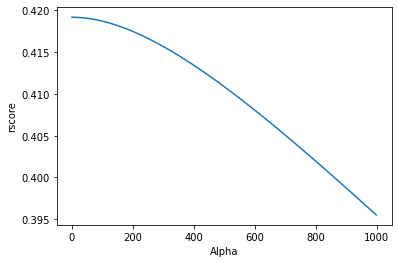

<Figure size 432x288 with 0 Axes>

In [89]:
# Making a plot of the rscore of each alpha from 0 to 1000
import matplotlib.pyplot as plt
plt.plot(rscore)
plt.xlabel("Alpha")
plt.ylabel("rscore")
plt.show()
plt.clf()

In [90]:
# Using the optimum alpha for developing the model
ridge_reg = Ridge(alpha=rscore.argmax())
ridge_reg.fit(X_train,y_train)
yhat = ridge_reg.predict(X_train)
r2_score(y_train, yhat)

0.4191657031138274

In [91]:
yhat_test = ridge_reg.predict(X_test)
r2_score(y_test, yhat_test)

0.6459896239575063

In [92]:
# Determining the mean squared loss of the model
mean_squared_error(y_test, yhat_test)

653505878.4745432

In [93]:
# Determing the optimum alpha for the lasso regression model
from sklearn.linear_model import Lasso
rscore = []
for alpha in range(5000):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    yhat = lasso_reg.predict(X_train)
    rscore_ = r2_score(y_train, yhat)
    rscore.append(rscore_)
rscore = np.array(rscore)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.407e+12, tolerance: 1.057e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

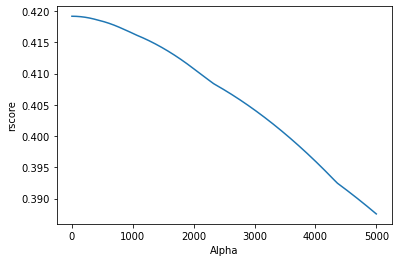

<Figure size 432x288 with 0 Axes>

In [94]:
# Making a plot of the rscore of each alpha from 0 to 5000
plt.plot(rscore)
plt.xlabel("Alpha")
plt.ylabel("rscore")
plt.show()
plt.clf()

In [95]:
lasso_reg = Lasso(alpha=rscore.argmax())
lasso_reg.fit(X_train, y_train)
yhat = lasso_reg.predict(X_train)
r2_score(y_train, yhat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.407e+12, tolerance: 1.057e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

0.41916570311382795

In [96]:
yhat_test = lasso_reg.predict(X_test)
r2_score(y_test, yhat_test)

0.6459896239575049

In [97]:
mean_squared_error(y_test, yhat_test)

653505878.4745455

In [98]:
Z = df2.drop(["lower_salary", "upper_salary"], axis = "columns")

In [99]:
Z.isna().sum()

title scraped for    0
Country              0
Position             0
year_of_exp          0
contract_type        0
eligibility          0
R                    0
Spark                0
C++                  0
Java                 0
SQL                  0
C                    0
Python               0
D                    0
AWS                  0
Git                  0
ML                   0
CSS                  0
HTML                 0
Excel                0
Go                   0
PostgreSQL           0
Vi                   0
client               0
ETL                  0
Machine Learning     0
                     0
SDLC                 0
dtype: int64

In [100]:
yhat_test = lasso_reg.predict(Z)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [101]:
for i in range(X.shape[0]):
    Z.loc[i,["lower_salary", "upper_salary"]] = yhat_test[i]
    i +=1

In [102]:
Z.groupby(["Country", "title scraped for", "Position"])[["lower_salary","upper_salary"]].agg(np.mean)

lower_salary   upper_salary
Country title scraped for Position                              
0.0     0.0               0.0        62893.447502   86341.924939
                          1.0        67201.214438   92134.929291
                          2.0        66226.677019   89602.485321
        1.0               0.0        74386.761732  100092.818431
                          1.0        71610.127867   96036.125235
                          2.0        75794.360673  102344.814496
        2.0               0.0        84097.510071  111401.304996
                          1.0       154258.017255  200557.821718
                          2.0       106983.975006  140879.718707
        3.0               0.0        76583.412446  102735.248872
                          1.0        74696.844371   99936.890228
                          2.0        78938.034517  106595.052271
        4.0               0.0       117148.597442  153825.041303
                          1.0       117257.193381  153906.195731
                          2.0       116025.419741  152190.264678
2.0     0.0               1.0       154218.996771  202773.489146
                          2.0       154241.673789  202829.594207
        1.0               1.0       173020.973407  223851.722579
                          2.0       163830.873939  213272.585378
        2.0               0.0       145203.748519  187642.982690
                          1.0       144503.290963  186665.349778
                          2.0       134961.609735  175779.195533
        3.0               1.0                 NaN            NaN
                          2.0                 NaN            NaN
        4.0               0.0       122643.388830  158631.768705
                          1.0       125300.935232  161735.502961
                          2.0       125689.702226  162898.023184
3.0     0.0               0.0       161126.392809  209035.184252
                          1.0       124585.630742  163393.278189
                          2.0       132691.312959  173505.092692
        1.0               0.0       165341.496190  214135.959455
                          1.0       166506.060006  215155.425514
                          2.0       167194.036724  217074.822951
        2.0               0.0       166730.576779  215257.627232
                          1.0       169243.624539  218424.606943
                          2.0       170892.055253  219834.346384
        3.0               0.0       173813.575616  223880.045523
                          1.0       174633.343719  225050.837259
                          2.0       173671.943159  224022.483762
        4.0               0.0       134678.470938  174956.273935
                          1.0       130388.725066  169251.601485
                          2.0       132326.012181  171659.795860

In [103]:
XX

,title scraped for,Country,Position,year_of_exp,contract_type,eligibility,R,Spark,C++,Java,...,HTML,Excel,Go,PostgreSQL,Vi,client,ETL,Machine Learning,,SDLC
1,3.0,0.0,0,1.000000,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0,2.000000,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0,2.022137,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0,2.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,0.0,0,1.000000,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,3.0,2.0,2,9.000000,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5637,3.0,2.0,2,9.000000,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5638,3.0,2.0,2,9.000000,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,3.0,2.0,2,9.000000,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights_lower_salary = pd.Series(model.coef_[0], feat.columns).sort_values()
    weights_lower_salary_df = pd.DataFrame(weights_lower_salary).reset_index()
    weights_lower_salary_df.columns = ['Features', col_name]
    weights_lower_salary_df[col_name].round(3)
    
    weights_upper_salary = pd.Series(model.coef_[1], feat.columns).sort_values()
    weights_upper_salary_df = pd.DataFrame(weights_upper_salary).reset_index()
    weights_upper_salary_df.columns = ['Features', col_name]
    weights_upper_salary_df[col_name].round(3)
    
    weights_df = weights_lower_salary_df.merge(weights_upper_salary_df,how = 'inner', on="Features")
    return weights_df
lasso_reg_weights = get_weights_df(lasso_reg, XX, 'lasso_reg_Weight_lower_salary')

In [105]:
lasso_reg_weights

,Features,lasso_reg_Weight_lower_salary_x,lasso_reg_Weight_lower_salary_y
0,year_of_exp,-3163.010873,-3437.769053
1,D,0.000000,0.000000
2,Machine Learning,0.000000,0.000000
3,ETL,0.000000,0.000000
4,client,0.000000,0.000000
5,Vi,0.000000,0.000000
6,PostgreSQL,0.000000,0.000000
7,Go,0.000000,0.000000
8,Excel,0.000000,0.000000
9,HTML,0.000000,0.000000
